In [1]:
# aim is to load in some of the data and show some stuff to do with it...

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import collections

import scipy.io.wavfile
import collections

import sys, os
sys.path.append(os.path.expanduser('~/projects/engaged_hackathon/'))
from engaged.features import frequency
import IPython

In [2]:
base_path = '/home/michael/projects/engaged_hackathon_data/urban_8k/'
meta_path = base_path + 'UrbanSound8K/metadata/UrbanSound8K.csv'
wav_path = base_path + 'UrbanSound8K/audio/'

In [3]:
# load in the metadata
# for l in csv.reader(open(meta_path)):
#     print l
import pandas as pd
data = pd.read_csv(meta_path)
print data.keys()

Index([u'slice_file_name', u'fsID', u'start', u'end', u'salience', u'fold',
       u'classID', u'class'],
      dtype='object')


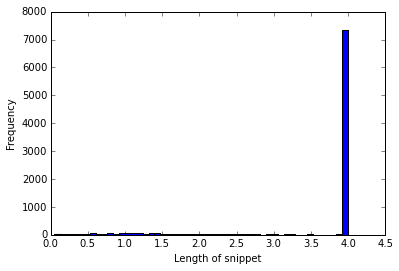

In [4]:
lens = [data['end'][i] - data['start'][i] for i in data.index]
plt.hist(lens, 50);
plt.xlabel('Length of snippet')
plt.ylabel('Frequency')

In [5]:
counts = collections.Counter(data['class'])

for classname, count in counts.most_common():
    percentage = 100 * float(count) / len(data)
    print str(classname).ljust(25) + str(count).ljust(10) + ('%0.2f%%' % percentage).ljust(10)
    
print "-" * 45
print "TOTAL".ljust(25) + str(len(data)).ljust(10)

air_conditioner          1000      11.45%    
children_playing         1000      11.45%    
dog_bark                 1000      11.45%    
drilling                 1000      11.45%    
engine_idling            1000      11.45%    
jackhammer               1000      11.45%    
street_music             1000      11.45%    
siren                    929       10.64%    
car_horn                 429       4.91%     
gun_shot                 374       4.28%     
---------------------------------------------
TOTAL                    8732      


(513, 398)
(513, 398)
(513, 398)
(513, 63)
(513, 259)
(513, 30)
(513, 398)
(513, 398)
(513, 398)
(513, 398)


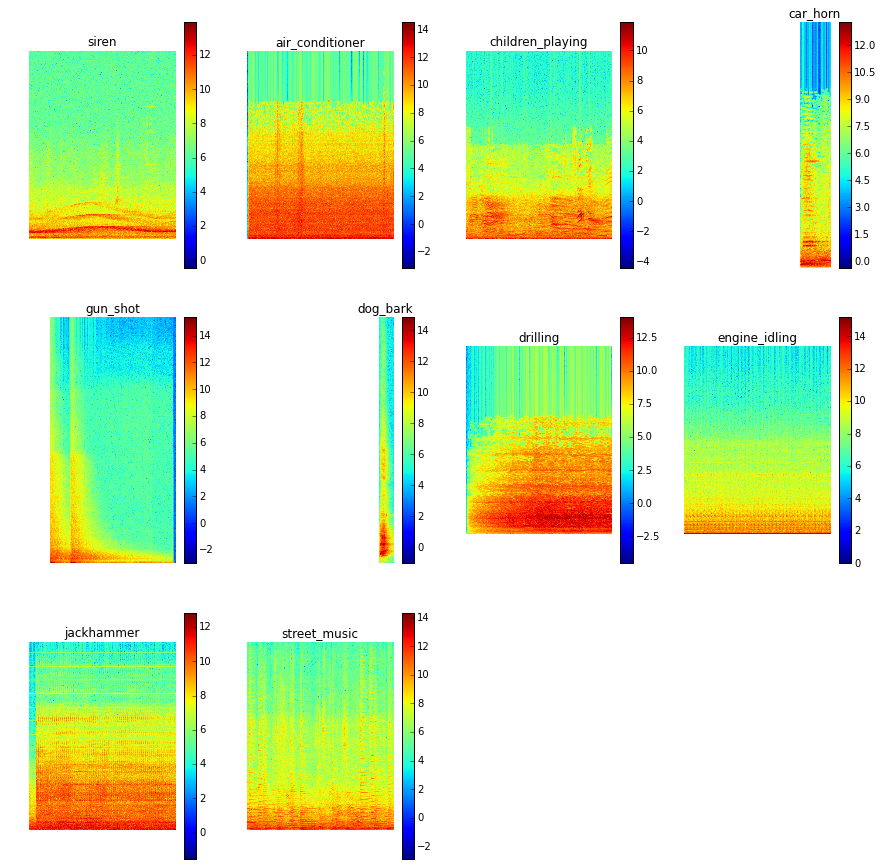

In [11]:
# getting the paths to an example from each class...
class_to_path = {}
for i in data.index:
    if data['class'][i] not in class_to_path:
        folder = 'fold' + str(data['fold'][i]) + '/'
        class_to_path[data['class'][i]] = folder + data['slice_file_name'][i]
        
spectrogram_parameters = {
    'nfft': 1024,
    'window_width': 0.03,
    'overlap': 0.01
    }

import skimage.transform

def disp_spec(path):
    sample_rate, wav = scipy.io.wavfile.read(path)
    spec = frequency.spectrogram(wav[:, 0].ravel(), sample_rate, **spectrogram_parameters)[0]
    print spec.shape
#     spec = skimage.transform.resize(spec, (128, 128))
    plt.imshow(spec)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar()

plt.figure(figsize=(15, 15))
for count, (key, val) in enumerate(class_to_path.iteritems()):
    plt.subplot(3, 4, count+1)
    try:
        disp_spec(wav_path + val)
        plt.title(key)
    except Exception as s:
        print "failed " + key + str(s)

In [30]:
D = scipy.io.loadmat('../../../engaged_hackathon_data/urban_8k/splits/split1.mat')
print D['train_y']
class_id_to_name = {row[1]['classID']:row[1]['class'] for row in data.iterrows()}
print class_id_to_name

[[3 2 2 ..., 1 1 1]]
{0: 'air_conditioner', 1: 'car_horn', 2: 'children_playing', 3: 'dog_bark', 4: 'drilling', 5: 'engine_idling', 6: 'gun_shot', 7: 'jackhammer', 8: 'siren', 9: 'street_music'}


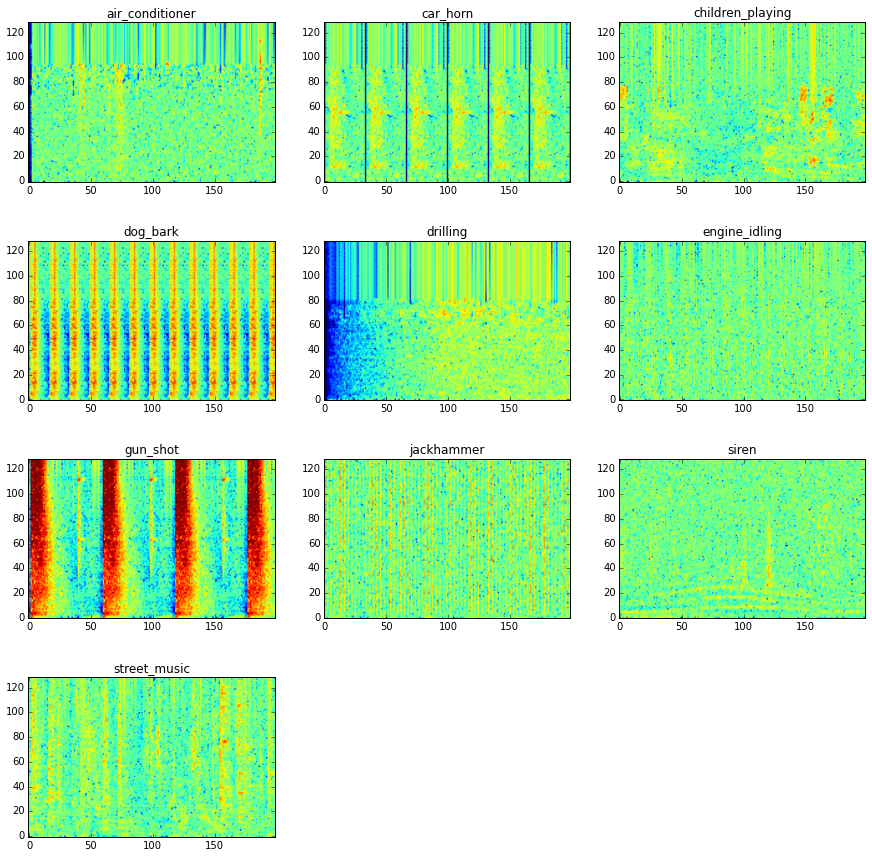

In [38]:
plt.figure(figsize=(15, 15))
for count, (classid, classname) in enumerate(class_id_to_name.iteritems()):
    idx = np.where(D['train_y'].ravel() == classid)[0][0]
    
    plt.subplot(4, 3, count+1)
    plt.imshow(D['train_X'][idx][0, :, :])
    plt.gca().invert_yaxis()
    plt.title(classname)
    plt.clim(-5, 5)

In [7]:
# getting the paths to an example from each class...
class_to_path = {}
for i in data.index:
    if data['class'][i] not in class_to_path:
        folder = 'fold' + str(data['fold'][i]) + '/'
        class_to_path[data['class'][i]] = folder + data['slice_file_name'][i]
print class_to_path
sds
def disp_spec(path):
    sample_rate, wav = scipy.io.wavfile.read(path)
    spec = frequency.spectrogram(wav[:, 0].ravel(), sample_rate, **spectrogram_parameters)[0]

    plt.imshow(spec)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar()

plt.figure(figsize=(15, 15))
for count, (key, val) in enumerate(class_to_path.iteritems()):
    plt.subplot(3, 4, count+1)
    try:
        disp_spec(wav_path + val)
        plt.title(key)
    except Exception as s:
        print "failed " + key + str(s)

{'siren': 'fold7/102853-8-0-0.wav', 'air_conditioner': 'fold5/100852-0-0-0.wav', 'children_playing': 'fold5/100263-2-0-117.wav', 'car_horn': 'fold10/100648-1-0-0.wav', 'gun_shot': 'fold1/102305-6-0-0.wav', 'dog_bark': 'fold5/100032-3-0-0.wav', 'drilling': 'fold3/103199-4-0-0.wav', 'engine_idling': 'fold10/102857-5-0-0.wav', 'jackhammer': 'fold1/103074-7-0-0.wav', 'street_music': 'fold7/101848-9-0-0.wav'}


NameError: name 'sds' is not defined

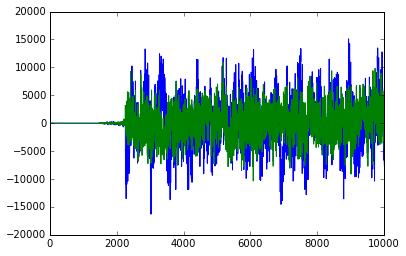

In [34]:
sample_rate, wav = scipy.io.wavfile.read(wav_path + class_to_path['air_conditioner'])
plt.plot(wav[:10000, :])

44100


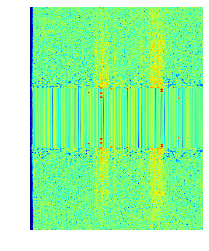

In [8]:
disp_spec(wav_path + class_to_path['air_conditioner'])
IPython.display.Audio(wav_path + class_to_path['air_conditioner'])

44100


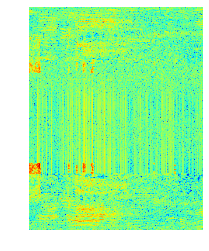

In [9]:
disp_spec(wav_path + class_to_path['children_playing'])
IPython.display.Audio(wav_path + class_to_path['children_playing'])

44100


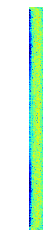

In [10]:
disp_spec(wav_path + class_to_path['dog_bark'])
IPython.display.Audio(wav_path + class_to_path['dog_bark'])

44100


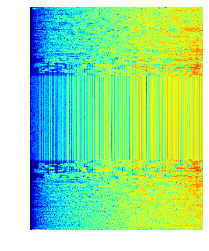

In [11]:
disp_spec(wav_path + class_to_path['drilling'])
IPython.display.Audio(wav_path + class_to_path['drilling'])

44100


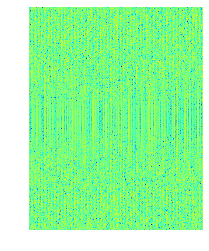

In [12]:
disp_spec(wav_path + class_to_path['engine_idling'])
IPython.display.Audio(wav_path + class_to_path['engine_idling'])

In [13]:
disp_spec(wav_path + class_to_path['jackhammer'])
IPython.display.Audio(wav_path + class_to_path['jackhammer'])

ValueError: Unsupported bit depth: the wav file has 24 bit data.

In [ ]:
disp_audio(wav_path + class_to_path['street_music'])
IPython.display.Audio(wav_path + class_to_path['street_music'])

In [53]:
# disp_audio(wav_path + class_to_path['siren'])
IPython.display.Audio(wav_path + class_to_path['siren'])

In [ ]:
IPython.display.Audio(wav_path + class_to_path['car_horn'])

In [ ]:
IPython.display.Audio(wav_path + class_to_path['gun_shot'])